In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from fa2l import force_atlas2_layout
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
G = nx.read_gexf("seth_rich_overall_web.gexf")
G = max(nx.weakly_connected_component_subgraphs(G), key=len).to_undirected()

In [7]:
pos = force_atlas2_layout(
        G,
        iterations=50,
        pos_list=None,
        node_masses=None,
        outbound_attraction_distribution=False,
        lin_log_mode=False,
        prevent_overlapping=True,
        edge_weight_influence=1.0,

        jitter_tolerance=1.0,
        barnes_hut_optimize=True,
        barnes_hut_theta=0.5,

        scaling_ratio=20,
        strong_gravity_mode=False,
        multithread=False,
        gravity=1.0)


In [8]:
colormap = {"right":'#f44295','center':'#e5f0f9', 'center_left':'#e5f0f9', 'center_right':'#e5f0f9', 'left':'#e5f0f9', 
            'null':'#e5f0f9'}
color_by = "partisan_retweet"
size_field = 'inlink_count'

In [9]:
def set_node_color(G,color_by,colormap=None):
    node_colors = [colormap[n[1][color_by]] for n in G.nodes(data=True)]
    return node_colors


In [10]:
def set_node_size(G,size_field,max_node_size,):
    max_node_val = max([n[1][size_field] for n in G.nodes(data=True)])
    node_sizes = [max_node_size * (n[1][size_field] / max_node_val) for n in G.nodes(data=True)]
    return node_sizes


In [29]:
def filter_graph(G,filter_by=None,top=None,all=None):
    filter = {n[0]:n[1][filter_by] for n in G.nodes(data=True)}
    filter_nodes = sorted(filter.items(), key=lambda x: x[1],reverse=True)[0:top]
    return G.subgraph([n[0] for n in filter_nodes])

In [12]:
def set_node_label(G,label):
    node_labels = dict((n[0], n[1][label]) for n in G.nodes(data=True))
    return node_labels

In [13]:
def get_subgraph_pos(G,pos):
    return {k:v for k,v in pos.items() if k in G.nodes()}

In [30]:
top_100_subgraph = filter_graph(G,filter_by="inlink_count",top=100).to_undirected()

In [15]:
node_colors = set_node_color(top_100_subgraph,color_by="partisan_retweet",colormap=colormap)

In [16]:
node_sizes = set_node_size(top_100_subgraph,size_field= "inlink_count",max_node_size=3000)

In [17]:
node_labels = set_node_label(top_100_subgraph,label = "label")

In [18]:
subgraph_pos = get_subgraph_pos(top_100_subgraph,pos)

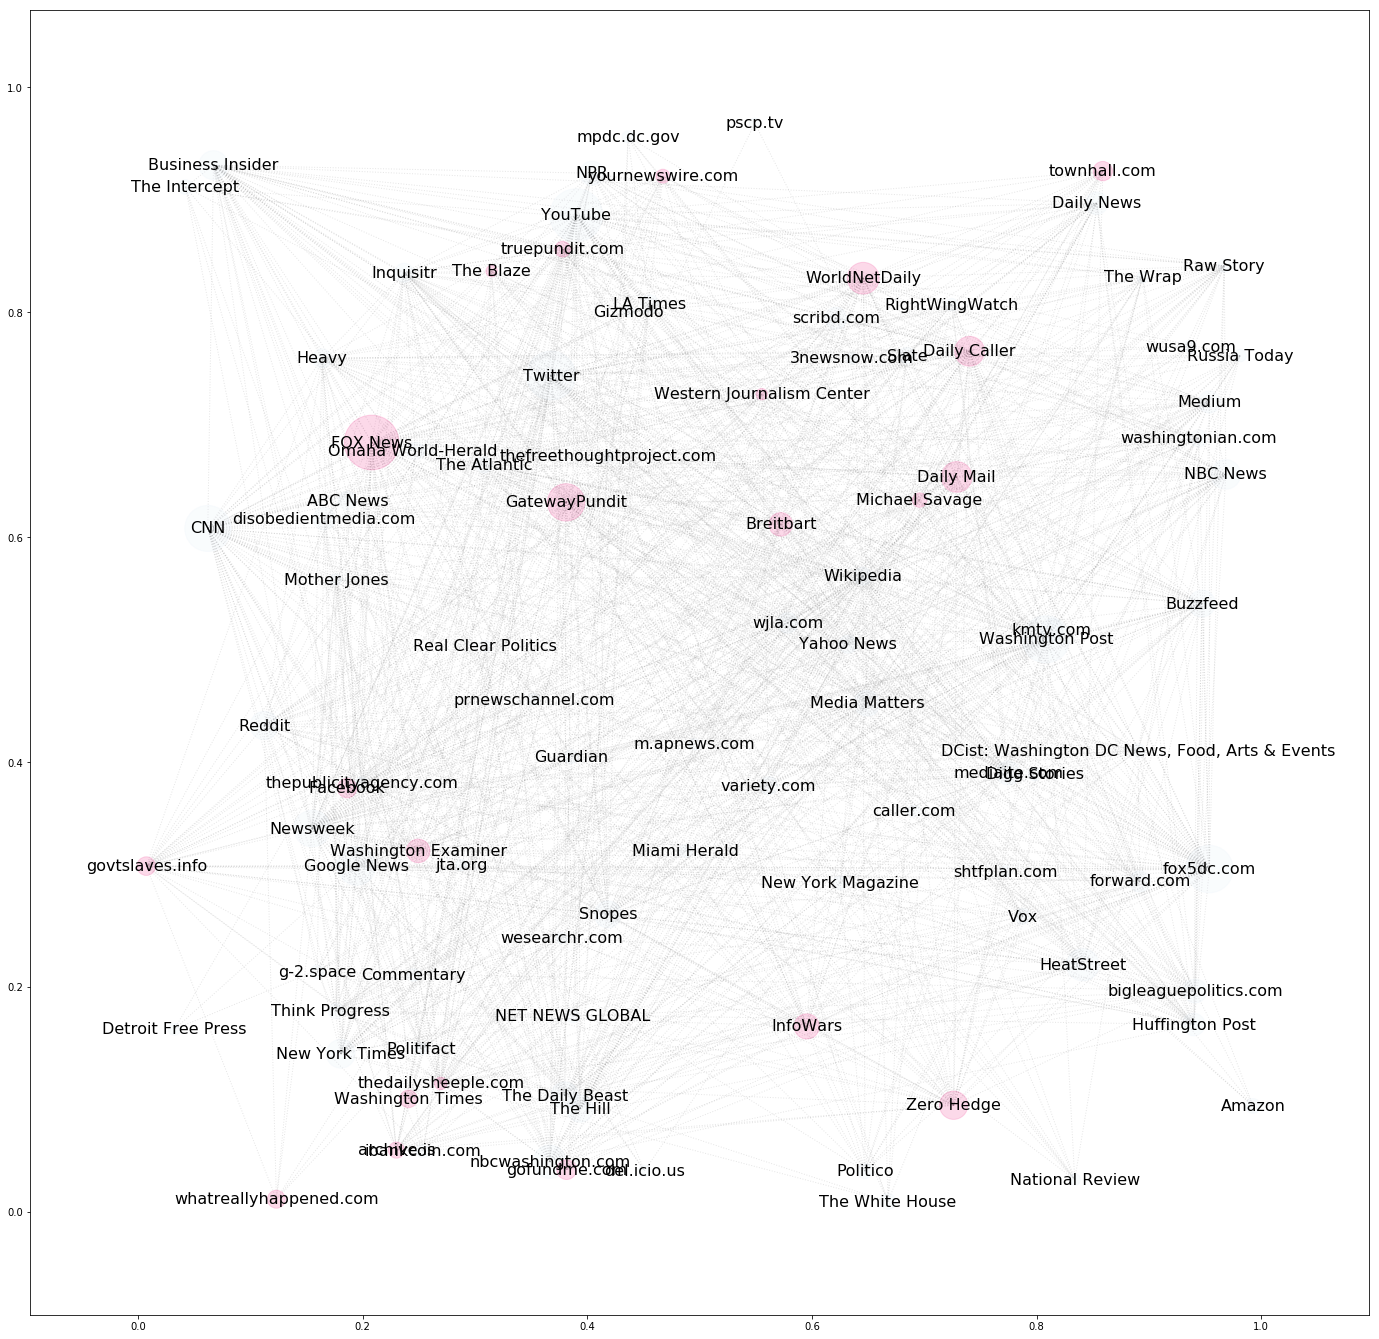

In [20]:
plt.figure(1, figsize=(24, 24))
nx.draw_networkx(top_100_subgraph,
                 pos=subgraph_pos,
                 node_color= node_colors, 
                 node_size = node_sizes,
                 edge_color = 'gray',
                 style = 'dotted',
                 font_size = 16,
                 labels = node_labels,
                 alpha = 0.2);